In [1]:
import pandas as pd
data11 = pd.read_excel('2-1.xlsx',sheet_name="一区队",index_col=0)
data12 = pd.read_excel('2-1.xlsx',sheet_name="二区队",index_col=0)
data13 = pd.read_excel('2-1.xlsx',sheet_name="三区队",index_col=0)
data2 = pd.read_excel('2-2.xlsx',index_col=0)

In [2]:
import os
thisData = pd.concat([data11])
thisData.to_excel(os.path.join("all.xlsx"))

In [3]:
index = ['班级','学号','姓名','性别','出生日期','年龄','身高(M)','体重(KG)',
         '引体向上/次','仰卧起坐/次','蛇形跑/秒','3000米/分秒']
for thisIndex in index:
    try:
        data2[thisIndex] = thisData[thisIndex]
    except KeyError:
        data2[thisIndex] = ' '

In [4]:
def taskToScore(scoreList,hisAns,p):
    ans = 100
    if p*hisAns>p*scoreList[0]:
        return '100'
    for i in range(1,10):
        if p*hisAns>p*scoreList[i]:
            ans = ans-5*i
            if p*scoreList[i-1]-p*scoreList[i]>0:
                ans += (hisAns-scoreList[i])/(scoreList[i-1]-scoreList[i])*5
            break
    if ans==100:
        return '50'
    return '%.2f'%ans
def mmss2mm(listIn):
    for i in range(0, len(listIn)):
        listIn[i] = listIn[i] // 100 + float(listIn[i] % 100 / 60)
    return listIn


weight = list(data2['体重(KG)'])
high = list(data2['身高(M)'])
age = list(data2['年龄'])
taskA = list(data2['引体向上/次'])
taskB = list(data2['仰卧起坐/次'])
taskC = list(data2['蛇形跑/秒'])
taskD = list(data2['3000米/分秒'])
classID = list(data2['班级'])
BMI = []
BMIJudge = []
taskAScore = []
taskBScore = []
taskCScore = []
taskDScore = []
taskAllScore = []
taskJudgeScore = []
countLv = [0,0,0,0]
for i in range(0,len(weight)):
    thisBIM = float(weight[i])/float(high[i])/float(high[i])
    BMI.append("%.2f"%thisBIM)
    high[i] = i+1
    if thisBIM<=18.4 or thisBIM>=28:
        BMIJudge.append("不合格")
    else:
        BMIJudge.append("合格")
    ageLv = 0
    thisAge = int(age[i])
    if thisAge>30:
        ageLv=3
    elif thisAge>27:
        ageLv=2
    elif thisAge>24:
        ageLv=1
    else:
        ageLv=0
    if ageLv==0:
        listA0 = [30,27,24,21,18,15,14,12,11,10]
        listB0 = [87,82,77,72,67,62,58,54,50,46]
        listC0 = [18.1,18.7,19,19.2,19.5,19.7,19.9,20.1,20.4,21.2]
        listD0 = [1130,1155,1210,1225,1240,1255,1310,1330,1335,1340]
        listD0 = mmss2mm(listD0)
    elif ageLv==1 or ageLv==2:
        listA0 = [28,25,22,19,16,14,13,11,10,9]
        listB0 = [82,77,72,67,63,59,55,51,47,43]
        listC0 = [18.3,18.9,19.3,19.5,19.8,20,20.2,20.4,20.8,21.5]
        listD0 = [1142,1207,1222,1237,1252,1307,1322,1342,1345,1352]
        listD0 = mmss2mm(listD0)
    else:
        listA0 = [13,20,17,15,13,11,10,9,8,7]
        listB0 = [78,73,68,63,59,55,51,47,13,39,35]
        listC0 = [18.7,19.3,19.7,19.9,20.1,20.3,20.7,21.1,21.3,21.7,22.6]
        listD0 = [1254,1319,1334,1349,1404,1419,1434,1444,1455,1500]
        listD0 = mmss2mm(listD0)
    taskAScore.append(taskToScore(listA0,int(taskA[i]),1))
    taskBScore.append(taskToScore(listB0,int(taskB[i]),1))
    taskCScore.append(taskToScore(listC0,int(taskC[i]),-1))
    timeD = int(taskD[i][0:2])+float(taskD[i][3:5])/60
    taskDScore.append(taskToScore(listD0,timeD,-1))
    taskAllScore.append(
        float(taskAScore[i])+float(taskBScore[i])+float(taskCScore[i])+float(taskDScore[i]))
    if taskAllScore[i]>340:
        taskJudgeScore.append("优秀")
        countLv[0]+=1
    elif  taskAllScore[i]>300:
        taskJudgeScore.append("良好")
        countLv[1]+=1
    elif  taskAllScore[i]>220:
        taskJudgeScore.append("及格")
        countLv[2]+=1
    else:
        taskJudgeScore.append("不及格")
        countLv[3]+=1
data2['序号'] = high
data2['BMI'] = BMI
data2['BMI评定'] = BMIJudge
data2['引体向上成绩'] = taskAScore
data2['仰卧起坐成绩'] = taskBScore
data2['蛇形跑成绩'] = taskCScore
data2['3000米成绩'] = taskDScore
data2['总成绩'] = taskAllScore
data2['总评'] = taskJudgeScore
data2.to_excel(os.path.join("./Output/数据汇总表.xlsx"))
#data2['BMI'] = (float)thisData['体重(KG)']/thisData['身高(M)']/thisData['身高(M)']

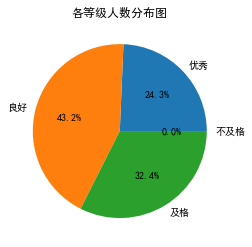

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'SimHei'
p1 = plt.pie(countLv,
             labels=['优秀','良好','及格','不及格'],
             autopct='%.1f%%')
plt.title("各等级人数分布图")
plt.savefig('./Output/P1.png')

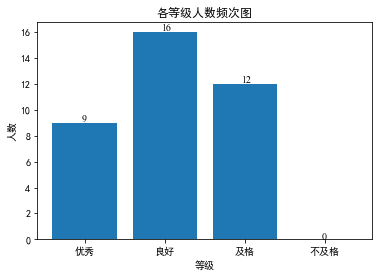

In [6]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.04, 1.01*height, '%s' % int(height), size=10, family="Times new roman")

p2 = plt.bar(['优秀','良好','及格','不及格'],countLv)
plt.xlabel("等级")
plt.ylabel("人数")
plt.title("各等级人数频次图")
autolabel(p2)
plt.savefig('./Output/P2.png')

[3, 2, 4, 6, 6, 4, 3, 3, 6]


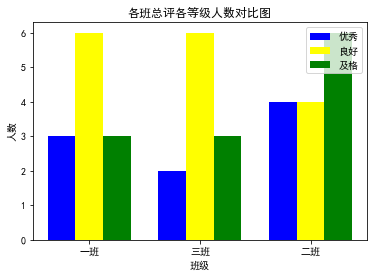

In [7]:
def classAdd(classX,str,data):
    if str=='优秀':
        data[classX]+=1
    elif str=='良好':
        data[3+classX]+=1
    else:
        data[6+classX]+=1

classDraw = [0,0,0,0,0,0,0,0,0]
for i in range(0,len(weight)):
    if classID[i] == '一班':
        classAdd(0,taskJudgeScore[i],classDraw)
    elif classID[i] == '三班':
        classAdd(1,taskJudgeScore[i],classDraw)
    else:
         classAdd(2,taskJudgeScore[i],classDraw)
print(classDraw)
barWidth = 0.25   # 设置柱子的宽度
# 设置横轴刻度在多列柱子的中间
r1 = [0,1,2]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1,classDraw[0:3],label='优秀',color='blue',width=barWidth)
plt.bar(r2,classDraw[3:6],label='良好',color='yellow',width=barWidth)
p3 = plt.bar(r3,classDraw[6:9],label='及格',color='green',width=barWidth)
plt.xticks([r + barWidth for r in range(3)], labels=['一班','三班','二班'], fontproperties='SimHei', size=10)
plt.legend(loc=1,prop={'family': 'SimHei', 'size': 10})
plt.xlabel('班级')
plt.ylabel('人数')
plt.title('各班总评各等级人数对比图')
plt.savefig('./Output/P3.png')

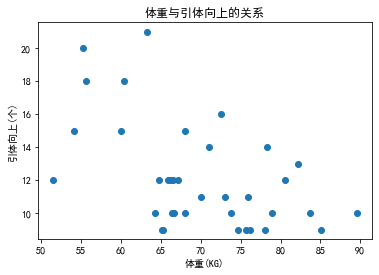

In [8]:
p4 = plt.scatter(weight, taskA)
plt.xlabel('体重(KG)')
plt.ylabel('引体向上(个)')
plt.title('体重与引体向上的关系')
plt.savefig('./Output/P4.png')

In [ ]:
import reportlab
from reportlab.pdfbase import pdfmetrics   # 注册字体
from reportlab.pdfbase.ttfonts import TTFont # 字体类
from reportlab.platypus import Table, SimpleDocTemplate, Paragraph, Image  # 报告内容相关类
from reportlab.lib.pagesizes import letter  # 页面的标志尺寸(8.5*inch, 11*inch)
from reportlab.lib.styles import getSampleStyleSheet  # 文本样式
from reportlab.lib import colors  # 颜色模块
from reportlab.graphics.charts.barcharts import VerticalBarChart  # 图表类
from reportlab.graphics.charts.legends import Legend  # 图例类
from reportlab.graphics.shapes import Drawing  # 绘图工具
from reportlab.lib.units import cm  # 单位：cm

# 注册字体(提前准备好字体文件, 如果同一个文件需要多种字体可以注册多个)
pdfmetrics.registerFont(TTFont('SimSun', 'SimSun.ttf'))
class Graphs:
    # 绘制标题
    @staticmethod
    def draw_title(title: str):
        # 获取所有样式表
        style = getSampleStyleSheet()
        # 拿到标题样式
        ct = style['Heading1']
        # 单独设置样式相关属性
        ct.fontName = 'SimSun'      # 字体名
        ct.fontSize = 18            # 字体大小
        ct.leading = 50             # 行间距
        ct.textColor = colors.green     # 字体颜色
        ct.alignment = 1    # 居中
        ct.bold = True
        # 创建标题对应的段落，并且返回
        return Paragraph(title, ct)

  # 绘制小标题
    @staticmethod
    def draw_little_title(title: str):
        # 获取所有样式表
        style = getSampleStyleSheet()
        # 拿到标题样式
        ct = style['Normal']
        # 单独设置样式相关属性
        ct.fontName = 'SimSun'  # 字体名
        ct.fontSize = 15  # 字体大小
        ct.leading = 30  # 行间距
        ct.textColor = colors.red  # 字体颜色
        # 创建标题对应的段落，并且返回
        return Paragraph(title, ct)

    # 绘制普通段落内容
    @staticmethod
    def draw_text(text: str):
        # 获取所有样式表
        style = getSampleStyleSheet()
        # 获取普通样式
        ct = style['Normal']
        ct.fontName = 'SimSun'
        ct.fontSize = 12
        ct.wordWrap = 'CJK'     # 设置自动换行
        ct.alignment = 0        # 左对齐
        ct.firstLineIndent = 32     # 第一行开头空格
        ct.leading = 25
        return Paragraph(text, ct)

    # 绘制表格
    @staticmethod
    def draw_table(*args):
        # 列宽度
        col_width = 25
        style = [
            ('FONTNAME', (0, 0), (-1, -1), 'SimSun'),  # 字体
            ('FONTSIZE', (0, 0), (-1, 0), 3),  # 第一行的字体大小
            ('FONTSIZE', (0, 1), (-1, -1), 5),  # 第二行到最后一行的字体大小
            ('BACKGROUND', (0, 0), (-1, 0), '#d5dae6'),  # 设置第一行背景颜色
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # 第一行水平居中
            ('ALIGN', (0, 1), (-1, -1), 'CENTER'),  # 第二行到最后一行水平居中
            ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),  # 所有表格上下居中对齐
            ('TEXTCOLOR', (0, 0), (-1, -1), colors.darkslategray),  # 设置表格内文字颜色
            ('GRID', (0, 0), (-1, -1), 0.5, colors.grey),  # 设置表格框线为grey色，线宽为0.5
        ]
        table = Table(args, rowHeights=10 ,colWidths=col_width, style=style)
        return table

    # 绘制图片
    @staticmethod
    def draw_img(path):
        img = Image(path)       # 读取指定路径下的图片
        return img


content = []

# 添加标题
content.append(Graphs.draw_title('学员一队体能考核成绩分析报告'))
content.append(Graphs.draw_text("本次考核共有{:}人参加，其中成绩为优秀的{:}人，良好{:}人，及格{:}人，不及格{:}人。".format(sum(countLv),countLv[0],countLv[1],countLv[2],countLv[3])))
linesList = []
titles = ['序号'	,'班级','学号','姓名','性别','出生日期','年龄','身高(M)','体重(KG)','BMI','BMI评定','引体向上/次','引体向上成绩','仰卧起坐/次','仰卧起坐成绩','蛇形跑/秒','蛇形跑成绩','3000米/分秒','3000米成绩','总成绩','总评']
linesList.append(tuple(titles))
for line in range(1,len(weight)+1):
    thisLineList = []
    for eachTitle in titles:
        thisLineList.append(data2[eachTitle][line])
    linesList.append(tuple(thisLineList))
content.append(Graphs.draw_table(*linesList))
content.append(Graphs.draw_img('./Output/P1.png'))
content.append(Graphs.draw_img('./Output/P2.png'))
content.append(Graphs.draw_img('./Output/P3.png'))
content.append(Graphs.draw_img('./Output/P4.png'))
# 生成pdf文件
doc = SimpleDocTemplate('./Output/report.pdf', pagesize=letter)
doc.build(content)